# 1. Set up the notebook

Do imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from IPython.display import Image
from ae483tools import *

# 2. Estimate the mass

Find the mass $m$ of the drone in kilograms.

In [2]:
m = 34.2/1000 # mass in kg

Find a worst-case bound $\Delta m$ on the uncertainty of your estimate. This bound should be chosen so that the true mass is guaranteed to be in the interval $[m - \Delta m, m + \Delta m]$.

In [3]:
delta_m = 0.01/1000 # based on scale parameters in kg

# 3. Estimate the moment of inertia about the $x_B$-axis

This is the apparatus used to measure the moment of inertia in the $x$-direction, $J_x$. The drone was suspended by the motors by two nails. 

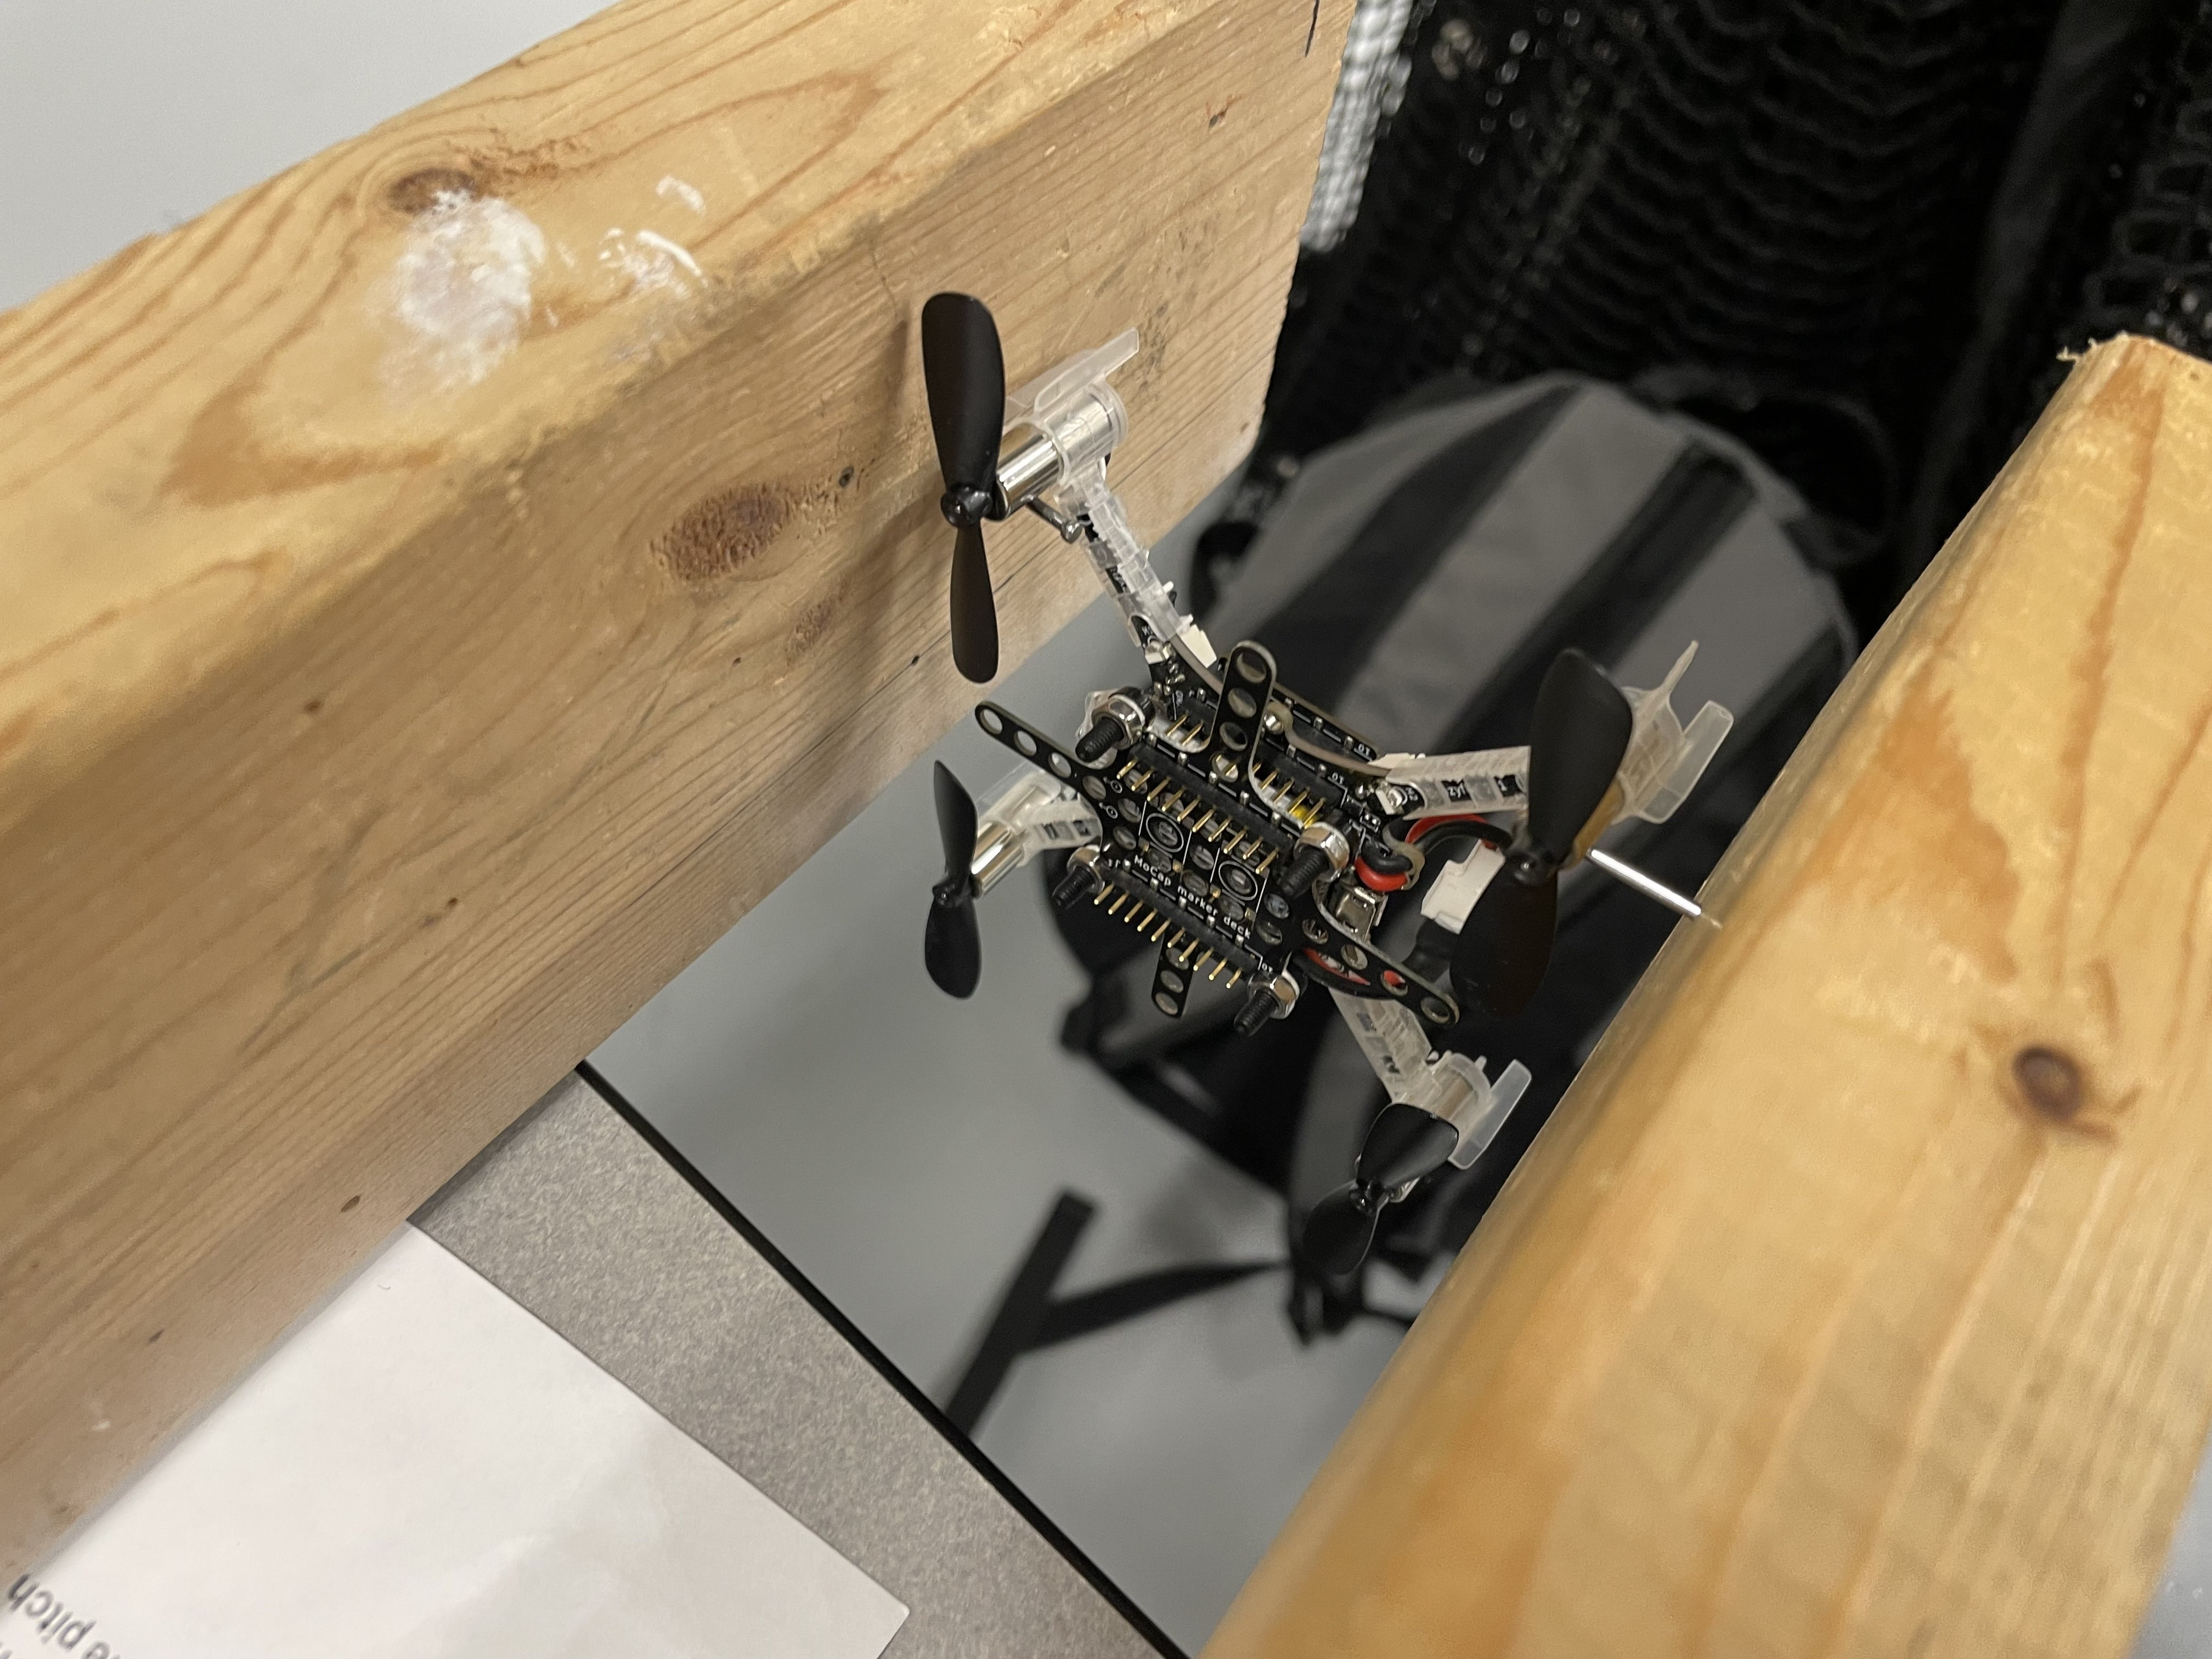

In [4]:
Image(filename='x-rig.jpg', width=480)

Find the distance in meters between the axis of rotation and the center of mass.

In [5]:
r = 29.26/1000 # in meters

Find a worst-case bound $\Delta r$ on the uncertainty of your estimate.

In [6]:
delta_r = 0.50/1000 # in meters

Load, resample, and parse data to get time and the three components of angular velocity (in radians / second).

In [7]:
# Load data
raw_data_drone, raw_data_mocap = load_hardware_data('x_data.json')

# Resample data
data_drone = resample_data_drone(raw_data_drone)

# Parse data
t = data_drone['time']
w_x = np.deg2rad(data_drone['gyro.x'])
w_y = np.deg2rad(data_drone['gyro.y'])
w_z = np.deg2rad(data_drone['gyro.z'])

Plot all three components of angular velocity. 

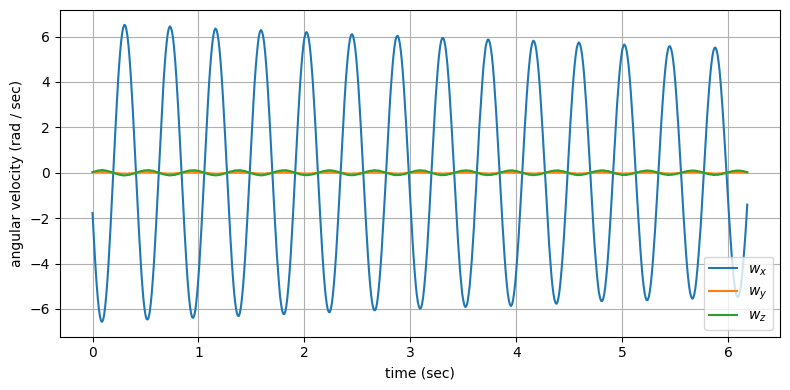

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)
ax.plot(t, w_x, label='$w_x$')
ax.plot(t, w_y, label='$w_y$')
ax.plot(t, w_z, label='$w_z$')
ax.set_xlabel('time (sec)')
ax.set_ylabel('angular velocity (rad / sec)')
ax.legend()
ax.grid()
plt.show()

Find the peak-to-peak time.

In [39]:
# Find the index of each peak (increase "prominence" if you get bad results)
peaks = find_peaks(w_x, prominence=0)
i_peaks = peaks[0]

# Find the time at each peak
t_peaks = t[i_peaks]

# Find w_x at each peak (for visualization)
w_x_peaks = w_x[i_peaks]

# Find the difference between consecutive peak times

t_diff = t_peaks[1:] - t_peaks[:-1]

# Find the mean difference as an estimate of the oscillation period
T = np.mean(t_diff)

# Print the estimate
print(f'T = {T:.4f} sec')

T = 0.4292 sec


Sanity check — plot the peaks. We know these are good results because the data points are located on the peaks.

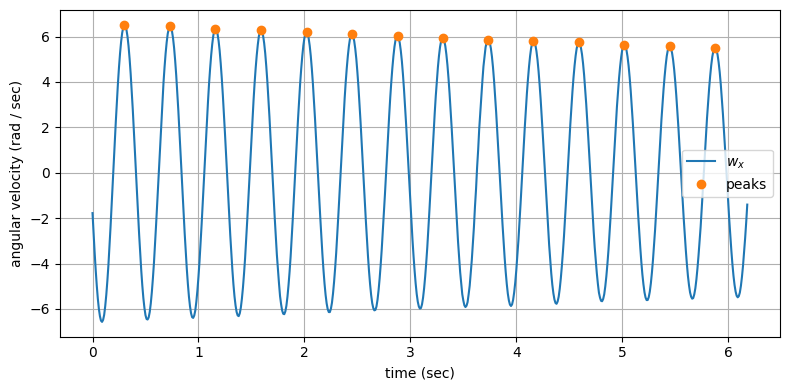

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)
ax.plot(t, w_x, label='$w_x$')
ax.plot(t_peaks, w_x_peaks, '.', markersize=12, label='peaks')
ax.set_xlabel('time (sec)')
ax.set_ylabel('angular velocity (rad / sec)')
ax.legend()
ax.grid()
plt.show()

Sanity check — plot the differences between consecutive peak times. We will know these results are good because the consecutive peak-to-peak times will lie close to colinear with the mean peak-to-peak time.

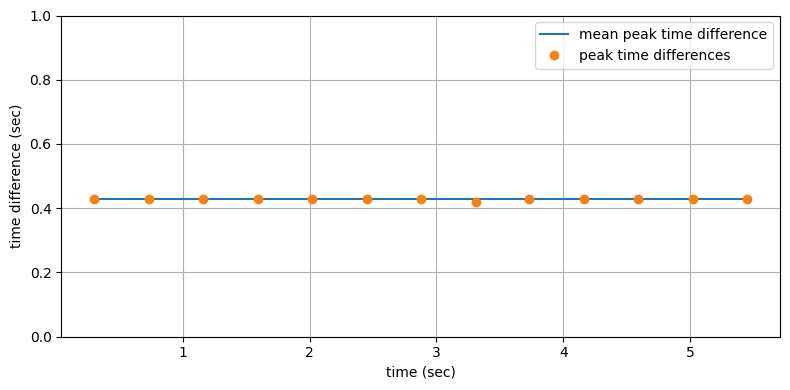

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)
ax.plot(t_peaks[:-1], T * np.ones_like(t_peaks[:-1]), label='mean peak time difference')
ax.plot(t_peaks[:-1], t_diff, '.', markersize=12, label='peak time differences')
ax.set_ylim(0., 1.)
ax.set_xlabel('time (sec)')
ax.set_ylabel('time difference (sec)')
ax.grid()
ax.legend()
plt.show()

Find a worst-case bound $\Delta T$ on the uncertainty of the estimate. This is the 99.7% confidence interval.

In [42]:
delta_T = 3*np.std(t_diff)

Find the moment of inertia about the $x$ axis.

In [43]:
J_x = m*9.81*r*T**2/(4*np.pi**2)-m*r**2

Find a worst-case bound $\Delta J_x$ on the uncertainty in the estimate.



In [44]:
delta_J_x =  np.abs((9.81*r*T**2/(4*np.pi**2)-r**2)*delta_m)\
    +np.abs((m*9.81*T**2/(4*np.pi**2)-2*m*r)*delta_r)\
    +np.abs((2*m*9.81*r*T/(4*np.pi**2))*delta_T)

# 4. Estimate the moment of inertia about the $y_B$-axis

The same technique was used to gather data for the moment of inertia about the $y$-axis, $J_y$. The apparatus is shown below.

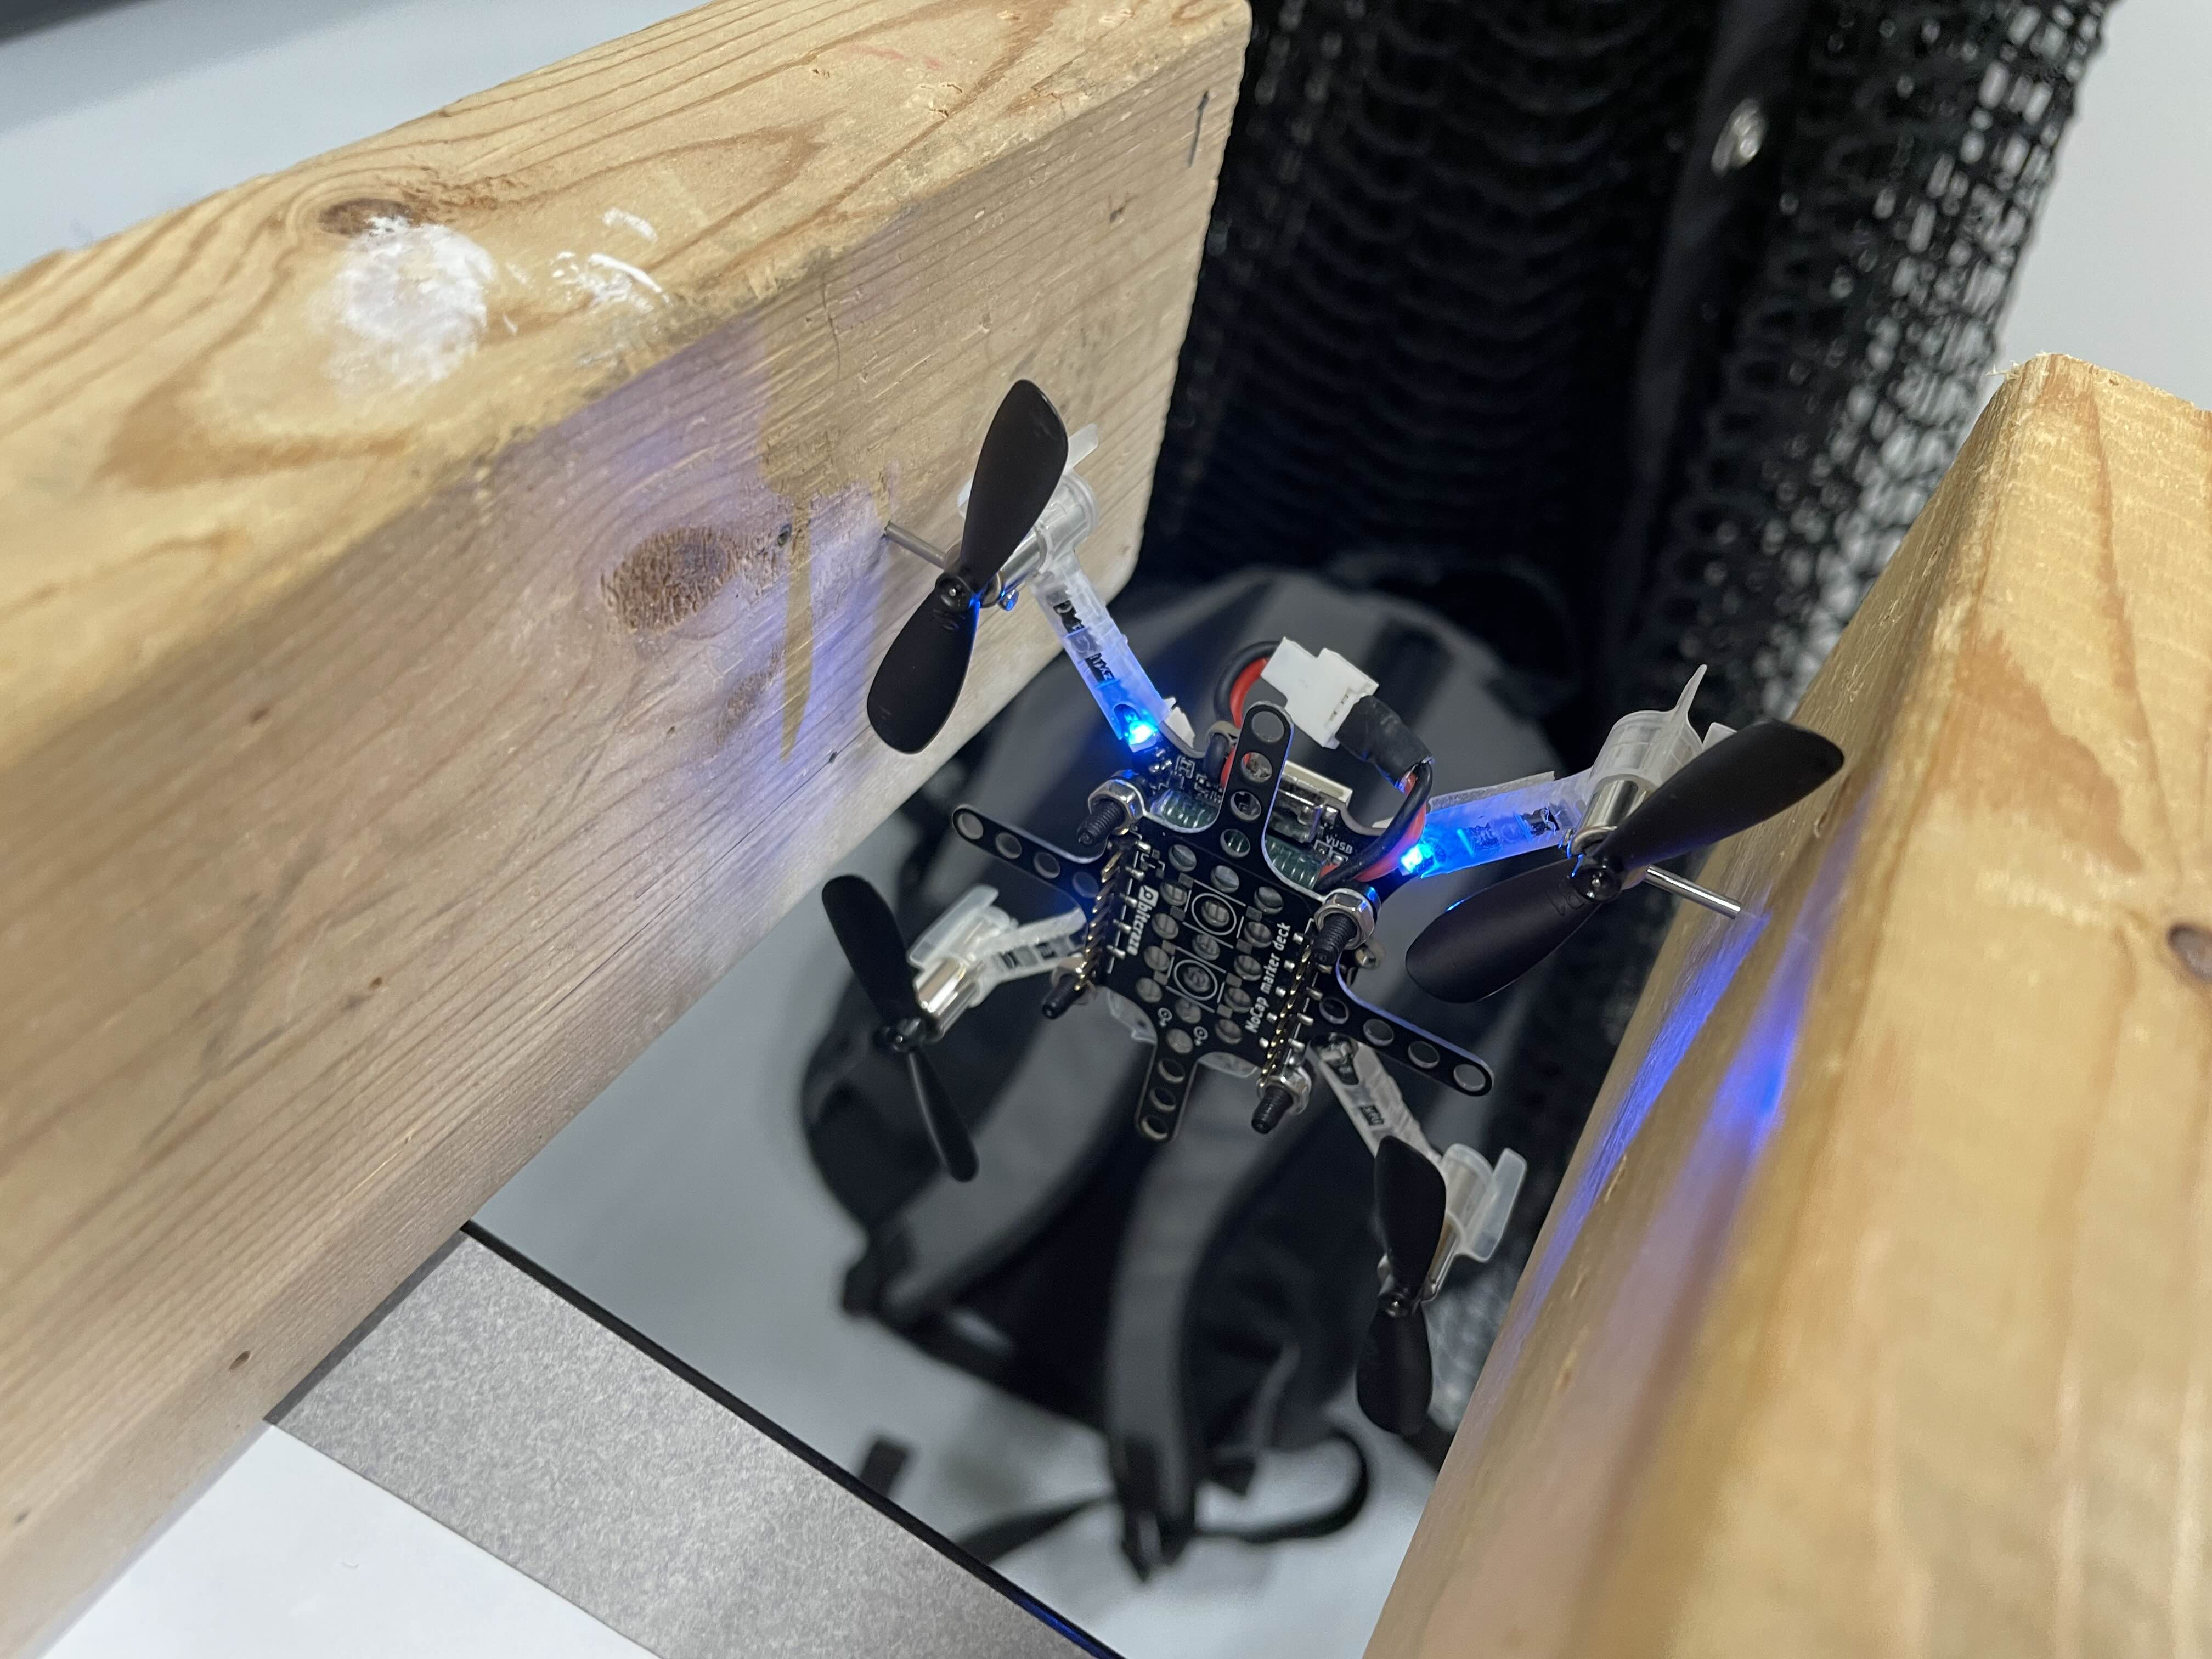

In [45]:
Image(filename='y-rig.jpg', width=480)

Load and plot the $y$ gyro data as before. 

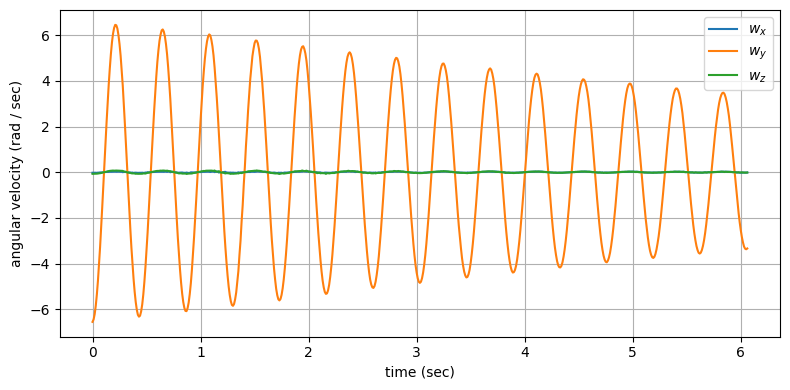

In [46]:
# Load data
raw_data_drone, raw_data_mocap = load_hardware_data('y_data.json')

# Resample data
data_drone = resample_data_drone(raw_data_drone)

# Parse data
t = data_drone['time']
w_x = np.deg2rad(data_drone['gyro.x'])
w_y = np.deg2rad(data_drone['gyro.y'])
w_z = np.deg2rad(data_drone['gyro.z'])

fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)
ax.plot(t, w_x, label='$w_x$')
ax.plot(t, w_y, label='$w_y$')
ax.plot(t, w_z, label='$w_z$')
ax.set_xlabel('time (sec)')
ax.set_ylabel('angular velocity (rad / sec)')
ax.legend()
ax.grid()
plt.show()

Find the peak-to-peak time.

In [47]:
# Find the index of each peak (increase "prominence" if you get bad results)
peaks = find_peaks(w_y, prominence=0)
i_peaks = peaks[0]

# Find the time at each peak
t_peaks = t[i_peaks]

# Find w_y at each peak (for visualization)
w_y_peaks = w_y[i_peaks]

t_diff = t_peaks[1:] - t_peaks[:-1]

# Find the mean difference as an estimate of the oscillation period
T = np.mean(t_diff)

# Print the estimate
print(f'T = {T:.4f} sec')

T = 0.4331 sec


Check that the peak-to-peak times line up.

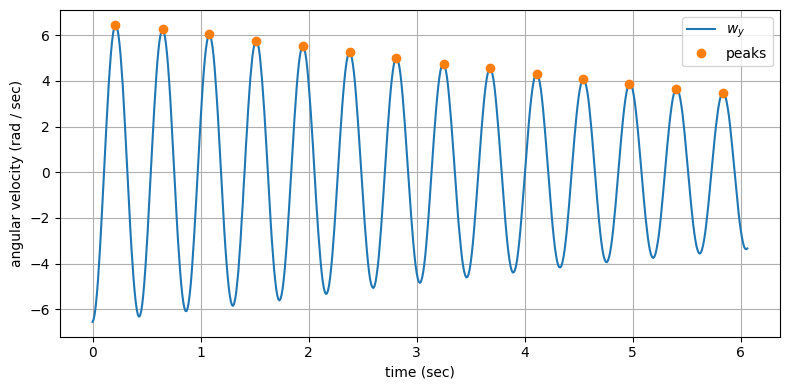

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)
ax.plot(t, w_y, label='$w_y$')
ax.plot(t_peaks, w_y_peaks, '.', markersize=12, label='peaks')
ax.set_xlabel('time (sec)')
ax.set_ylabel('angular velocity (rad / sec)')
ax.legend()
ax.grid()
plt.show()

Find a worst-case bound $\Delta T$ on the uncertainty of the estimate. This is the 99.7% confidence interval.

In [49]:
delta_T =  3*np.std(t_diff)

Compute the moment of inertia $J_y$ and the uncertainty $\Delta J_y$.

In [50]:
ry = 29.89/1000
delta_ry = 0.5/1000
J_y = m*9.81*ry*T**2/(4*np.pi**2)-m*ry**2
delta_J_y = np.abs((9.81*ry*T**2/(4*np.pi**2)-r**2)*delta_m)\
    +np.abs((m*9.81*T**2/(4*np.pi**2)-2*m*ry)*delta_ry)\
    +np.abs((2*m*9.81*ry*T/(4*np.pi**2))*delta_T)

# 5. Estimate the moment of inertia about the $z_B$-axis

To estimate the $z$-axis moment of inertia, $J_z$, was collected by balancing the drone on the sharp end of a pair of calipers 'clamped' to a table by the motor. This was not the only way we tried to collect the data but was the most successful with the least human disturbances. 

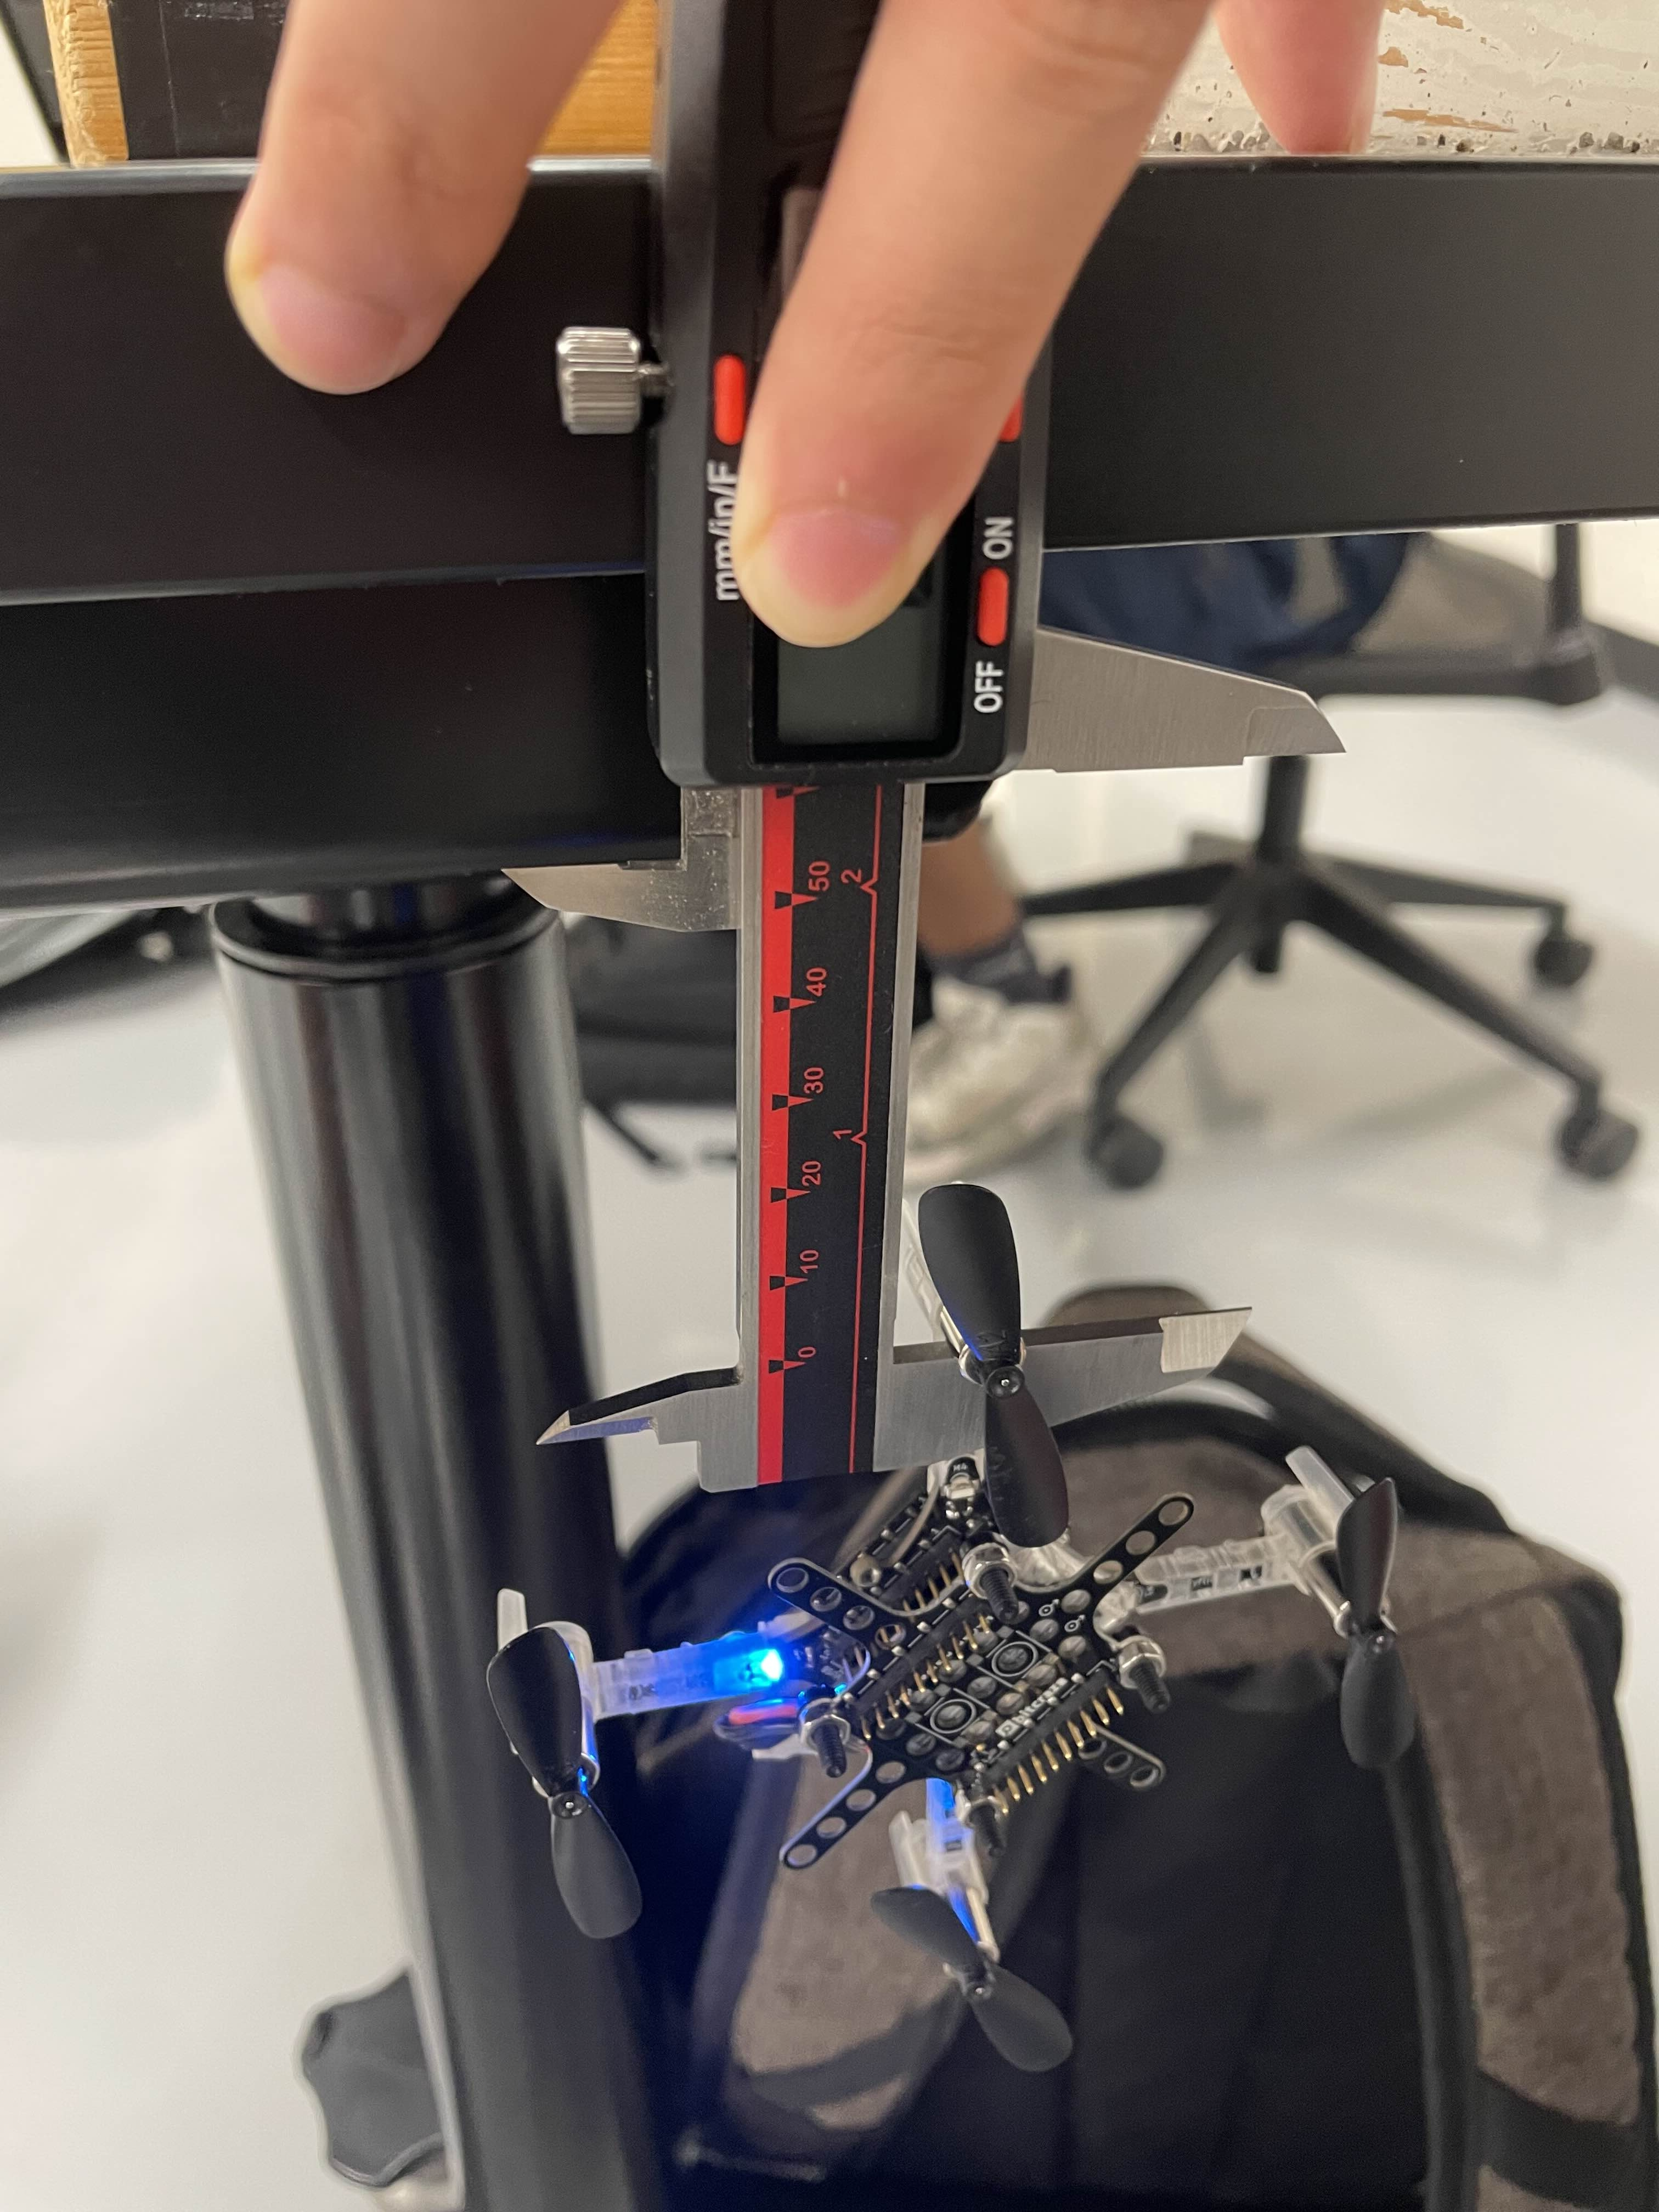

In [51]:
Image(filename='z-rig.jpg', width=480)

Load and plot the $z$ gyro data as before. 

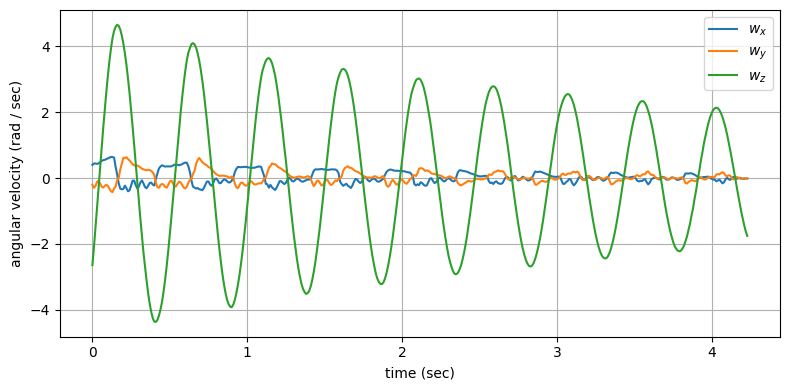

In [52]:
# Load data
raw_data_drone, raw_data_mocap = load_hardware_data('z_data.json')

# Resample data
data_drone = resample_data_drone(
    raw_data_drone,
    t_min_offset=0.,    # <-- FIXME
    t_max_offset=2.,    # <-- FIXME
)

# Parse data
t = data_drone['time']
w_x = np.deg2rad(data_drone['gyro.x'])
w_y = np.deg2rad(data_drone['gyro.y'])
w_z = np.deg2rad(data_drone['gyro.z'])

fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)
ax.plot(t, w_x, label='$w_x$')
ax.plot(t, w_y, label='$w_y$')
ax.plot(t, w_z, label='$w_z$')
ax.set_xlabel('time (sec)')
ax.set_ylabel('angular velocity (rad / sec)')
ax.legend()
ax.grid()
plt.show()

Find the peak-to-peak time.

In [53]:
# Find the index of each peak (increase "prominence" if you get bad results)
peaks = find_peaks(w_z, prominence=0)
i_peaks = peaks[0]

# Find the time at each peak
t_peaks = t[i_peaks]

# Find w_z at each peak (for visualization)
w_z_peaks = w_z[i_peaks]

t_diff = t_peaks[1:] - t_peaks[:-1]

# Find the mean difference as an estimate of the oscillation period
T = np.mean(t_diff)

# Print the estimate
print(f'T = {T:.4f} sec')

T = 0.4838 sec


Check that the peak-to-peak times line up.

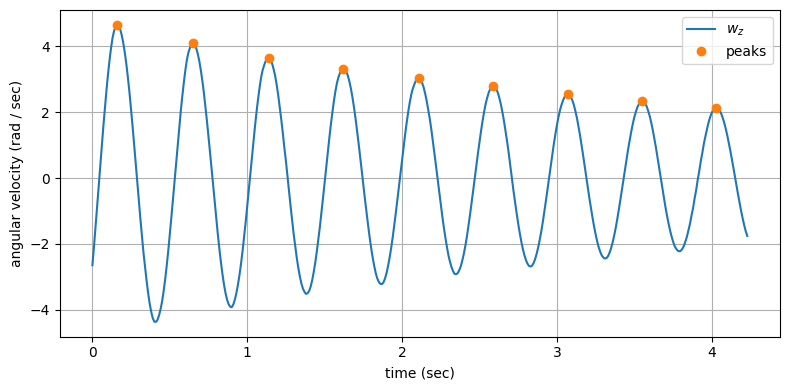

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)
ax.plot(t, w_z, label='$w_z$')
ax.plot(t_peaks, w_z_peaks, '.', markersize=12, label='peaks')
ax.set_xlabel('time (sec)')
ax.set_ylabel('angular velocity (rad / sec)')
ax.legend()
ax.grid()
plt.show()

Find a worst-case bound $\Delta T$ on the uncertainty of the estimate. This is the 99.7% confidence interval.

In [55]:
delta_T =  3*np.std(t_diff)

Compute the moment of inertia $J_z$ and the uncertainty $\Delta J_z$.

In [56]:
rz = (46.53932-3.5)/1000
delta_rz = 1.0/1000
J_z = m*9.81*rz*T**2/(4*np.pi**2)-m*rz**2         
delta_J_z = np.abs((9.81*rz*T**2/(4*np.pi**2)-rz**2)*delta_m)\
    +np.abs((m*9.81*T**2/(4*np.pi**2)-2*m*rz)*delta_rz)\
    +np.abs((2*m*9.81*rz*T/(4*np.pi**2))*delta_T)

# 6. Summarize and discuss the results

### Summary of results

In [57]:
print(f'm = {m:.2f} +/- {delta_m:.2f} kg')
print(f'J_x = {J_x:.2e} +/- {delta_J_x:.2e} kg m^2')
print(f'J_y = {J_y:.2e} +/- {delta_J_y:.2e} kg m^2')
print(f'J_z = {J_z:.2e} +/- {delta_J_z:.2e} kg m^2')

m = 0.03 +/- 0.00 kg
J_x = 1.64e-05 +/- 1.96e-06 kg m^2
J_y = 1.70e-05 +/- 3.31e-06 kg m^2
J_z = 2.21e-05 +/- 6.12e-06 kg m^2


### Analysis of uncertainty

**Modify the text in this cell** to answer the following questions:
* Which computed quantities ($J_x$, $J_y$, $J_z$) are the most uncertain?
    * The $J_z$ measurment is by far the most uncertain, about 2x the others.
* Which measured quantities ($m$, $r$, $T$) contribute the most to uncertainty in the computed quantities?
    * The $\Delta T$ measurement, in this case, contributed the most to the uncertainty.
* What assumptions were made and to what extent were these assumptions violated?
    * We assumed there was negligible friction/drag leading to the assumption the that the drone's period of oscillation did not change much. This proved to be close to true based on the plots.
    * We also assumed that the CoM of the drone was essentially in the center of the drone. We balnaced the drone on the sharp end of a pair of calipers to verify this approximately.
    * The testing marker deck is identical to the active marker deck. This should be negligibly different. 
* What sources of error might not be captured in your analysis of uncertainty?
    * Changing battery location/CoM location
    * Local gravity could be different from 9.81 m/s^2

### Ways to improve the results

Normally moment of inertia is measured by mounting the drone to a rotating platform of known performance. This could be done if we had access to a sufficiently accurate motor. We could also use a 3 axis scale to more accurately locate the CoM. 